In [1]:
%matplotlib inline

## Setup GPU Device

In [2]:
import random

In [3]:
import os
#Set GPU IDs for training:
os.environ["CUDA_VISIBLE_DEVICES"] = '1'

In [4]:
import dgl
def build_circuit_graph_undirected(node_list,edge_list):
    g = dgl.DGLGraph()
    g.add_nodes(len(node_list))
    src, dst = tuple(zip(*edge_list))
    g.add_edges(src, dst)
    g.add_edges(dst, src)
    return g

def build_circuit_graph_directed_sd(node_list,edge_list):
    g = dgl.DGLGraph()
    g.add_nodes(len(node_list))
    src, dst = tuple(zip(*edge_list))
    g.add_edges(src, dst)
    return g

def build_circuit_graph_directed_ds(node_list,edge_list):
    g = dgl.DGLGraph()
    g.add_nodes(len(node_list))
    src, dst = tuple(zip(*edge_list))
    g.add_edges(dst, src)
    return g

### Choose Number of Training Samples

### Train Test Split

In [5]:
import random
random.seed(1) #original=0
training_size = 10
training_idx = random.sample(list(range(5,65)), training_size) #exclude 4-bit adders
test_idx = [item for item in list(range(5,65)) if item not in training_idx]

In [6]:
training_idx

[13, 41, 59, 56, 53, 9, 21, 12, 36, 60]

In [7]:
len(training_idx),len(test_idx)

(10, 50)

## Pick Training Data

In [8]:
import os
import matplotlib.pyplot as plt
import networkx as nx
import csv
import numpy as np
dir = '/home/gpu-user-02/hdd/LT-user/Adder_Classification/main/preprocessing/processed_training_data'

trainset=[]
labels=[]
#for filename in os.listdir(dir):
np.random.seed(0) #original=1
sample_size = 10
# training_idx = np.random.randint(4,64,10)
training_idx_1 = np.random.choice(training_idx, size=sample_size, replace=False)
# training_idx_2 = np.random.choice(training_idx, size=sample_size, replace=False)
# training_idx_3 = np.random.choice(training_idx, size=sample_size, replace=False)
# training_idx_4 = np.random.choice(training_idx, size=sample_size, replace=False)

training_idx_2 = training_idx_1
training_idx_3 = training_idx_1
training_idx_4 = training_idx_1
# training_idx_1 = [6]
# training_idx_2 = [6]
# training_idx_3 = [6]
# training_idx_4 = [6]
print(training_idx_1,training_idx_2,training_idx_3,training_idx_4)

[59 36 53 60 41 21 12 56 13  9] [59 36 53 60 41 21 12 56 13  9] [59 36 53 60 41 21 12 56 13  9] [59 36 53 60 41 21 12 56 13  9]


### Prepare Training and Test Data

In [9]:
for idx in range(len(training_idx_1)):
    node_list=[]
    edge_list=[]
    label_list=[]
    node_list2=[]
    edge_list2=[]
    label_list2=[]
    node_list3=[]
    edge_list3=[]
    label_list3=[]
    node_list4=[]
    edge_list4=[]
    label_list4=[]
    for j in ["node_list","edge_list","graph_label"]:
        filename = "rca_"+str(training_idx_1[idx])+"bit"+j+'.csv'
        filename2 = "cla_"+str(training_idx_2[idx])+"bit"+j+'.csv'
        filename3 = "csa_"+str(training_idx_3[idx])+"bit"+j+'.csv'
        filename4 = "CSkipA_"+str(training_idx_4[idx])+"bit"+j+'.csv'
        if(filename.find("node_list")>=0):
            with open(dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                node_list = list(reader)
                
        if(filename.find("edge_list")>=0):
            with open(dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list = list(reader)
        if(filename.find("graph_label")>=0):
            with open(dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                label_list = list(reader)
        if(filename.find("gate_type")>=0):
            with open(dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type = list(reader)
        
        if(filename2.find("node_list")>=0):
            with open(dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                node_list2 = list(reader)
                
        if(filename2.find("edge_list")>=0):
            with open(dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list2 = list(reader)
        if(filename2.find("graph_label")>=0):
            with open(dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                label_list2 = list(reader)
        if(filename2.find("gate_type")>=0):
            with open(dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type2 = list(reader)
        
        if(filename3.find("node_list")>=0):
            with open(dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                node_list3 = list(reader)
                
        if(filename3.find("edge_list")>=0):
            with open(dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list3 = list(reader)
        if(filename3.find("graph_label")>=0):
            with open(dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                label_list3 = list(reader)
        if(filename3.find("gate_type")>=0):
            with open(dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type3 = list(reader)
        if(filename4.find("node_list")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                node_list4 = list(reader)
                
        if(filename4.find("edge_list")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list4 = list(reader)
        if(filename4.find("graph_label")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                label_list4 = list(reader)
        if(filename4.find("gate_type")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type4 = list(reader)
    #create dgl graph
    g=build_circuit_graph_undirected(node_list,edge_list)
    trainset.append(g)
    labels.append(label_list[0])
    g2=build_circuit_graph_undirected(node_list2,edge_list2)
    trainset.append(g2)
    labels.append(label_list2[0])
    g3=build_circuit_graph_undirected(node_list3,edge_list3)
    trainset.append(g3)
    labels.append(label_list3[0])
    g4=build_circuit_graph_undirected(node_list4,edge_list4)
    trainset.append(g4)
    labels.append(label_list4[0])

for i in labels:
    i[0] = int(i[0])

print(labels)

[[1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3]]


### Visualize Training Data

In [10]:
# graph = trainset[14]
# label=labels[14][0]

# fig, ax = plt.subplots()
# G=graph.to_networkx()
# pos=nx.spring_layout(G)
# nx.draw(G,pos)
# nx.draw_networkx_labels(G,pos, ax=ax)
# ax.set_title('Class: {:f}'.format(label))
# plt.show()

### Apply random shuffle to training set

In [11]:
##apply random shuffle on the trainset
np.random.seed(0)
randomize = np.arange(len(trainset))
np.random.shuffle(randomize)
labels_shuffled=[]
trainset_shuffled=[]
for i in range (len(randomize)):
    labels_shuffled.append(labels[randomize[i]])
    trainset_shuffled.append(trainset[randomize[i]])

In [12]:
len(trainset_shuffled)

40

In [13]:
import dgl

def collate(samples):
    # The input `samples` is a list of pairs
    #  (graph, label).
    graphs, labels = map(list, zip(*samples))
    batched_graph = dgl.batch(graphs)
    return batched_graph, torch.tensor(labels)

In [14]:
import dgl.function as fn
import torch
import torch.nn as nn

# Sends a message of node feature h.
msg = fn.copy_src(src='h', out='m')

def reduce(nodes):
    """Take an average over all neighbor node features hu and use it to
    overwrite the original node feature."""
    accum = torch.mean(nodes.mailbox['m'], 1)
    return {'h': accum}

class NodeApplyModule(nn.Module):
    """Update the node feature hv with ReLU(Whv+b)."""
    def __init__(self, in_feats, out_feats, activation):
        super(NodeApplyModule, self).__init__()
        self.linear = nn.Linear(in_feats, out_feats)
        self.activation = activation

    def forward(self, node):
        h = self.linear(node.data['h'])
        h = self.activation(h)
        return {'h' : h}

class GCN(nn.Module):
    def __init__(self, in_feats, out_feats, activation):
        super(GCN, self).__init__()
        self.apply_mod = NodeApplyModule(in_feats, out_feats, activation)

    def forward(self, g, feature):
        # Initialize the node features with h.
        g.ndata['h'] = feature
        g.update_all(msg, reduce)
        g.apply_nodes(func=self.apply_mod)
        return g.ndata.pop('h')

### Readout and classification

In [15]:
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self, in_dim, hidden_dim, n_classes):
        super(Classifier, self).__init__()

        self.layers = nn.ModuleList([
            GCN(in_dim, hidden_dim, F.relu),
            GCN(hidden_dim, hidden_dim, F.relu)])
        self.classify = nn.Linear(hidden_dim, n_classes)

    def forward(self, g):
        # For undirected graphs, in_degree is the same as
        # out_degree.
        h = g.in_degrees().view(-1, 1).float().cuda()
        for conv in self.layers:
            h = conv(g, h)
        g.ndata['h'] = h
        hg = dgl.mean_nodes(g, 'h')
        return self.classify(hg)

### Setup and training

In [16]:
import torch.optim as optim
from torch.utils.data import DataLoader

### Make Training Results Deterministic

In [17]:
# import torch
# torch.manual_seed(0)
# #CuDNN:
# torch.backends.cudnn.deterministic = True
# torch.backends.cudnn.benchmark = False

## Set Training Epoch

In [18]:
training_epoch = 500 #original = 1500 for 1 training sample 500 for 20 samples
initial_lr = 0.001

In [19]:
# Create model
#model = Classifier(1, 256, trainset.num_classes)
import time

model = Classifier(1, 256, 4)
model.cuda()
loss_func = nn.CrossEntropyLoss().cuda()
optimizer = optim.Adam(model.parameters(), lr = initial_lr)
# optimizer = optim.SGD(model.parameters(), lr = initial_lr, momentum=0.9, weight_decay=5e-4)

model.train()

labels_shuffled = torch.LongTensor(labels_shuffled).cuda()

epoch_losses = []

#start timer:
t0 = time.time()

for epoch in range(training_epoch):
    model.train()
    epoch_loss = 0
    for iter, bg in enumerate(trainset_shuffled):
        prediction=torch.zeros(1,4,dtype=torch.float64).cuda()
        prediction[0] = model(bg)

        loss = loss_func(prediction, labels_shuffled[iter])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.detach().item()
    epoch_loss /= (iter + 1)
    print('Epoch {}, loss {:.4f}'.format(epoch, epoch_loss))
    epoch_losses.append(epoch_loss)

training_time = time.time() - t0

print('Finished training. Training time = {:.4f} Seconds'.format(training_time))

#     if (epoch%5==0):
#         model.eval()
#         eval_bg = dgl.batch(trainset_shuffled)
#         eval_labels = torch.tensor(labels_shuffled).float().view(-1, 1)
#         probs_Y = torch.softmax(model(eval_bg), 1)
#         argmax_Y = torch.max(probs_Y, 1)[1].view(-1, 1)

#         print('Accuracy of argmax predictions on the test set: {:4f}%'.format(
#             (eval_labels == argmax_Y.float()).sum().item() / len(eval_labels) * 100))

Epoch 0, loss 1.6732
Epoch 1, loss 1.4900
Epoch 2, loss 1.4612
Epoch 3, loss 1.4363
Epoch 4, loss 1.4146
Epoch 5, loss 1.3935
Epoch 6, loss 1.3766
Epoch 7, loss 1.3988
Epoch 8, loss 1.3304
Epoch 9, loss 1.3018
Epoch 10, loss 1.2814
Epoch 11, loss 1.2666
Epoch 12, loss 1.1677
Epoch 13, loss 1.1385
Epoch 14, loss 1.1076
Epoch 15, loss 1.0359
Epoch 16, loss 1.0035
Epoch 17, loss 0.9816
Epoch 18, loss 0.9657
Epoch 19, loss 0.9566
Epoch 20, loss 0.9648
Epoch 21, loss 0.8955
Epoch 22, loss 0.9019
Epoch 23, loss 0.9106
Epoch 24, loss 0.9086
Epoch 25, loss 0.9152
Epoch 26, loss 0.8458
Epoch 27, loss 0.8257
Epoch 28, loss 0.8126
Epoch 29, loss 0.8015
Epoch 30, loss 0.7893
Epoch 31, loss 0.7766
Epoch 32, loss 0.7643
Epoch 33, loss 0.7524
Epoch 34, loss 0.7408
Epoch 35, loss 0.7304
Epoch 36, loss 0.7396
Epoch 37, loss 0.7585
Epoch 38, loss 0.7019
Epoch 39, loss 0.6966
Epoch 40, loss 0.6726
Epoch 41, loss 0.6611
Epoch 42, loss 0.6551
Epoch 43, loss 0.6374
Epoch 44, loss 0.6218
Epoch 45, loss 0.609

### Finish Training

### Plot Loss

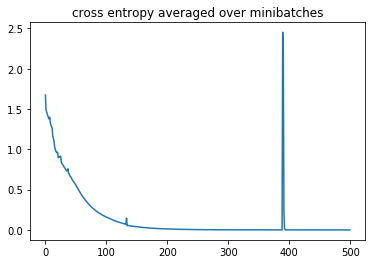

In [20]:
plt.title('cross entropy averaged over minibatches')
plt.plot(epoch_losses)
plt.show()

In [21]:
print(model.layers[0].apply_mod.linear.weight.size())
print(model.layers[1].apply_mod.linear.weight.size())
model.classify.weight.size()

torch.Size([256, 1])
torch.Size([256, 256])


torch.Size([4, 256])

### Get Testset data

In [22]:
testset = []
test_labels = []
test_dir = dir

testing_idx_1=[]
testing_idx_2=[]
testing_idx_3=[]
testing_idx_4=[]
for i in test_idx:
    testing_idx_1.append(i)
    testing_idx_2.append(i)
    testing_idx_3.append(i)
    testing_idx_4.append(i)
      
# print(testing_idx_1)
# print(training_idx_1)
# print(testing_idx_2)
# print(training_idx_2)
# print(testing_idx_3)
# print(training_idx_3)
# print(testing_idx_4)
# print(training_idx_4)

### Random Sample Nodes and Edges for Testing

In [23]:
#Remove redundant edges from edge list based on sampled node list
def remove_edges(node_list,edge_list):
    
    edge_list_keep = []
    for i in edge_list:
        cnt=0
        for j in i:
            if [j] in node_list:
                cnt=cnt+1
            if cnt==2:
                edge_list_keep.append(i)
                
    return edge_list_keep

#Map edge_list_keep to new node labels
def map_edge_list_keep(edge_list_keep,node_list_keep):
    
    edge_list_keep_mapped = []
    for i in edge_list_keep:
        edge_list_keep_mapped.append([node_list_keep.index([i[0]]),node_list_keep.index([i[1]])])

    return edge_list_keep_mapped

## Set Percentage Keep

In [24]:
pct_keep = 1

In [25]:
# random.seed(0)
for idx in range(len(testing_idx_1)):
    node_list=[]
    edge_list=[]
    label_list=[]
    node_list2=[]
    edge_list2=[]
    label_list2=[]
    node_list3=[]
    edge_list3=[]
    label_list3=[]
    node_list4=[]
    edge_list4=[]
    label_list4=[]
    for j in ["node_list","edge_list","graph_label"]:
        filename = "rca_"+str(testing_idx_1[idx])+"bit"+j+'.csv'
        filename2 = "cla_"+str(testing_idx_2[idx])+"bit"+j+'.csv'
        filename3 = "csa_"+str(testing_idx_3[idx])+"bit"+j+'.csv'
        filename4 = "CSkipA_"+str(testing_idx_4[idx])+"bit"+j+'.csv'
        
        if(filename.find("node_list")>=0):
            with open(test_dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                node_list = list(reader)
                
        if(filename.find("edge_list")>=0):
            with open(test_dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list = list(reader)
        if(filename.find("graph_label")>=0):
            with open(test_dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                label_list = list(reader)
        if(filename.find("gate_type")>=0):
            with open(test_dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type = list(reader)
        
        if(filename2.find("node_list")>=0):
            with open(test_dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                node_list2 = list(reader)
                
        if(filename2.find("edge_list")>=0):
            with open(test_dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list2 = list(reader)
        if(filename2.find("graph_label")>=0):
            with open(test_dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                label_list2 = list(reader)
        if(filename2.find("gate_type")>=0):
            with open(test_dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type2 = list(reader)
        if(filename3.find("node_list")>=0):
            with open(test_dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                node_list3 = list(reader)
                
        if(filename3.find("edge_list")>=0):
            with open(test_dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list3 = list(reader)
        if(filename3.find("graph_label")>=0):
            with open(test_dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                label_list3 = list(reader)
        if(filename3.find("gate_type")>=0):
            with open(test_dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type3 = list(reader)
        if(filename4.find("node_list")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                node_list4 = list(reader)
                
        if(filename4.find("edge_list")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list4 = list(reader)
        if(filename4.find("graph_label")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                label_list4 = list(reader)
        if(filename4.find("gate_type")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type4 = list(reader)
    
    #randomly sample nodes and edges from a list
    
    #Sample nodes, remove edges accordingly:
    seed = 1
    random.seed(seed)
    node_list_keep = random.sample(node_list,int(len(node_list)*pct_keep))
    edge_list_keep = remove_edges(node_list_keep,edge_list)
    edge_list_keep = map_edge_list_keep(edge_list_keep,node_list_keep)
#     node_list_keep = node_list
#     edge_list_keep = random.sample(edge_list,int(len(edge_list)*pct_keep))
    random.seed(seed)
    node_list2_keep = random.sample(node_list2,int(len(node_list2)*pct_keep))
    edge_list2_keep = remove_edges(node_list2_keep,edge_list2)
    edge_list2_keep = map_edge_list_keep(edge_list2_keep,node_list2_keep)
#     node_list2_keep = node_list2
#     edge_list2_keep = random.sample(edge_list2,int(len(edge_list2)*pct_keep))
    random.seed(seed)
    node_list3_keep = random.sample(node_list3,int(len(node_list3)*pct_keep))
    edge_list3_keep = remove_edges(node_list3_keep,edge_list3)
    edge_list3_keep = map_edge_list_keep(edge_list3_keep,node_list3_keep)
#     node_list3_keep = node_list3
#     edge_list3_keep = random.sample(edge_list3,int(len(edge_list3)*pct_keep))
    random.seed(seed)
    node_list4_keep = random.sample(node_list4,int(len(node_list4)*pct_keep))
    edge_list4_keep = remove_edges(node_list4_keep,edge_list4)
    edge_list4_keep = map_edge_list_keep(edge_list4_keep,node_list4_keep)
#     node_list4_keep = node_list4
#     edge_list4_keep = random.sample(edge_list4,int(len(edge_list4)*pct_keep))
    
    #create dgl graph
    g=build_circuit_graph_undirected(node_list_keep,edge_list_keep)
    testset.append(g)
    test_labels.append(label_list[0])
    g2=build_circuit_graph_undirected(node_list2_keep,edge_list2_keep)
    testset.append(g2)
    test_labels.append(label_list2[0])
    g3=build_circuit_graph_undirected(node_list3_keep,edge_list3_keep)
    testset.append(g3)
    test_labels.append(label_list3[0])
    g4=build_circuit_graph_undirected(node_list4_keep,edge_list4_keep)
    testset.append(g4)
    test_labels.append(label_list4[0])

for i in test_labels:
    i[0] = int(i[0])

test_labels = torch.tensor(test_labels).float().view(-1, 1).cuda()
# print(test_labels)

In [26]:
##apply random shuffle on the testset    
np.random.seed(0)
randomize = np.arange(len(testset))
np.random.shuffle(randomize)
testset_shuffled=[]
test_labels_shuffled=[]
for i in range (len(randomize)):
    test_labels_shuffled.append(test_labels[randomize[i]])
    testset_shuffled.append(testset[randomize[i]])

### Test on Testset

In [27]:
model.eval()
test_bg = dgl.batch(testset_shuffled)
test_labels_shuffled = torch.tensor(test_labels_shuffled).float().view(-1, 1).cuda()
probs_Y = torch.softmax(model(test_bg), 1)

sampled_Y = torch.multinomial(probs_Y, 1)
argmax_Y = torch.max(probs_Y, 1)[1].view(-1, 1)
print('Accuracy of sampled predictions on the test set: {:.4f}%'.format(
    (test_labels_shuffled == sampled_Y.float()).sum().item() / len(test_labels) * 100))
print('Accuracy of argmax predictions on the test set: {:.4f}%'.format(
    (test_labels_shuffled == argmax_Y.float()).sum().item() / len(test_labels) * 100))

# zip(model(test_bg),(test_labels))
# for i1,i2 in zip(probs_Y,(test_labels)):
#     print(i1,i2)
# print(torch.max(probs_Y, 1))

Accuracy of sampled predictions on the test set: 98.5000%
Accuracy of argmax predictions on the test set: 99.0000%


## Finish Testing

## Get Error Items

In [28]:
error = (test_labels_shuffled != argmax_Y.float()).nonzero()
print('Total', len(error),'errors out of',len(test_idx)*4,'test data')
for i in error.cpu().numpy():
    error_idx= i[0]
    print(probs_Y[error_idx],test_labels_shuffled[error_idx])
#     print(i[0])

Total 2 errors out of 200 test data
tensor([1.0422e-04, 3.2834e-03, 6.9284e-07, 9.9661e-01], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([2.], device='cuda:0')
tensor([4.4863e-05, 8.8958e-08, 2.2105e-03, 9.9774e-01], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([2.], device='cuda:0')


In [29]:
test_accuracy = '{:4f}'.format((test_labels_shuffled == argmax_Y.float()).sum().item() / len(test_labels) * 100)

## Save Trained Model

In [30]:
from datetime import datetime

dateTimeObj = datetime.now()
 
timestampStr = dateTimeObj.strftime("%d-%b-%Y-%H:%M:%S")
 
print('Current Timestamp : ', timestampStr)

Current Timestamp :  13-Apr-2020-13:44:00


In [31]:
'4-class-model_{}-samples_{}-epoch_acc-'.format(sample_size,training_epoch)+test_accuracy+'_'+'{}-errs_'.format(len(error))+timestampStr


'4-class-model_10-samples_500-epoch_acc-99.000000_2-errs_13-Apr-2020-13:44:00'

In [32]:
#set model name:
model_name = '4-class-model_{}-samples_{}-epoch_acc-'.format(sample_size,training_epoch)+test_accuracy+'_'+'{}-errs_'.format(len(error))+timestampStr

SAVE_PATH = '/home/gpu-user-02/hdd/LT-user/Adder_Classification/main/models/' + model_name
torch.save(model.state_dict(), SAVE_PATH)

## Load Model

In [33]:
# model_name = '4class_1Sample_97.580645_0411'

# model_name = '4-class-model_10-samples_500-epoch_acc-99.500000_1-errs_12-Apr-2020-14:35:45'

SAVE_PATH = '/home/gpu-user-02/hdd/LT-user/Adder_Classification/main/models/' + model_name
model = Classifier(1, 256, 4)
model.load_state_dict(torch.load(SAVE_PATH))
model.cuda()
model.eval()

Classifier(
  (layers): ModuleList(
    (0): GCN(
      (apply_mod): NodeApplyModule(
        (linear): Linear(in_features=1, out_features=256, bias=True)
      )
    )
    (1): GCN(
      (apply_mod): NodeApplyModule(
        (linear): Linear(in_features=256, out_features=256, bias=True)
      )
    )
  )
  (classify): Linear(in_features=256, out_features=4, bias=True)
)

In [34]:
# (test_labels != argmax_Y.float()).nonzero()

## Visualize Activations

In [35]:
GCN1_act = []
GCN2_act = []
graph_emb = []
final_class = []

def get_activation_1(self,input,output):
#     print(output.size())
    GCN1_act.append(output.data.cpu().numpy())
    
def get_activation_2(self,input,output):
#     print(output.size())
    GCN2_act.append(output.data.cpu().numpy())
    
def get_activation_3(self,input,output):
#     print(output.size())
    graph_emb.append(input[0].cpu().detach().numpy())
    final_class.append(output.data.cpu().numpy())

In [36]:
h1 = model.layers[0].register_forward_hook(get_activation_1)
h2 = model.layers[1].register_forward_hook(get_activation_2)
h3 = model.classify.register_forward_hook(get_activation_3)

# for i in range(len(testset)):
#     out = model(testset[i])

In [37]:
error = []
probs_Y2_error = []

for i in range(len(testset)):
    out = model(testset[i])
    probs_Y2 = torch.softmax(out,0)
    argmax_Y2 = torch.max(probs_Y2, 0)[1].view(-1, 1)
    if  test_labels[i]!=argmax_Y2.float():
        error.append(i)
        probs_Y2_error.append(probs_Y2)

In [38]:
print('Number of Errors: {}'.format(len(error)))

Number of Errors: 2


In [39]:
for i in range(len(error)):
    print('error {}'.format(i+1))
    print(test_labels[error[i]])
    print(probs_Y2_error[i])

error 1
tensor([2.], device='cuda:0')
tensor([1.0422e-04, 3.2834e-03, 6.9284e-07, 9.9661e-01], device='cuda:0',
       grad_fn=<SoftmaxBackward>)
error 2
tensor([2.], device='cuda:0')
tensor([4.4862e-05, 8.8958e-08, 2.2105e-03, 9.9774e-01], device='cuda:0',
       grad_fn=<SoftmaxBackward>)


In [40]:
len(GCN1_act),len(GCN2_act),len(graph_emb),len(final_class)

(200, 200, 200, 200)

In [41]:
GCN1_act_vis_ls = []
GCN2_act_vis_ls = []
graph_emb_vis_ls = []
final_class_vis_ls = []

for i in range(len(GCN1_act)):
    GCN1_act_vis_ls.append(np.expand_dims(np.mean(GCN1_act[i],axis=0),axis=0))
    GCN2_act_vis_ls.append(np.expand_dims(np.mean(GCN2_act[i],axis=0),axis=0))
    graph_emb_vis_ls.append(np.expand_dims(graph_emb[i],axis=0))
    final_class_vis_ls.append(np.expand_dims(final_class[i],axis=0))

In [42]:
GCN1_act_vis = np.concatenate(GCN1_act_vis_ls, axis=0)
GCN2_act_vis = np.concatenate(GCN2_act_vis_ls, axis=0)
graph_emb_vis = np.concatenate(graph_emb_vis_ls, axis=0)
final_class_vis = np.concatenate(final_class_vis_ls, axis=0)

In [43]:
GCN1_act_vis.shape,GCN2_act_vis.shape,graph_emb_vis.shape,final_class_vis.shape

((200, 256), (200, 256), (200, 256), (200, 4))

In [44]:
# GCN1_act[0].size(),GCN2_act[0].size(),graph_emb[0].size(),final_class[0]

In [45]:
import tsne
vis1 = tsne.tsne(GCN1_act_vis, 2, 30)
vis2 = tsne.tsne(GCN2_act_vis, 2, 30)
vis3 = tsne.tsne(graph_emb_vis, 2, 30)
vis4 = tsne.tsne(final_class_vis, 2, 30)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 200...
Mean value of sigma: 0.217729
Iteration 10: error is 9.830714
Iteration 20: error is 8.458653
Iteration 30: error is 8.775538
Iteration 40: error is 8.654623
Iteration 50: error is 8.467384
Iteration 60: error is 8.714093
Iteration 70: error is 8.563980
Iteration 80: error is 8.760284
Iteration 90: error is 8.672228
Iteration 100: error is 8.725125
Iteration 110: error is 0.846778
Iteration 120: error is 0.415877
Iteration 130: error is 0.277960
Iteration 140: error is 0.207296
Iteration 150: error is 0.123219
Iteration 160: error is 0.096326
Iteration 170: error is 0.090852
Iteration 180: error is 0.088714
Iteration 190: error is 0.086961
Iteration 200: error is 0.085498
Iteration 210: error is 0.084015
Iteration 220: error is 0.082496
Iteration 230: error is 0.081139
Iteration 240: error is 0.079910
Iteration 250: error is 0.078826
Iteration 260: error is 0.077924
Iteration 27

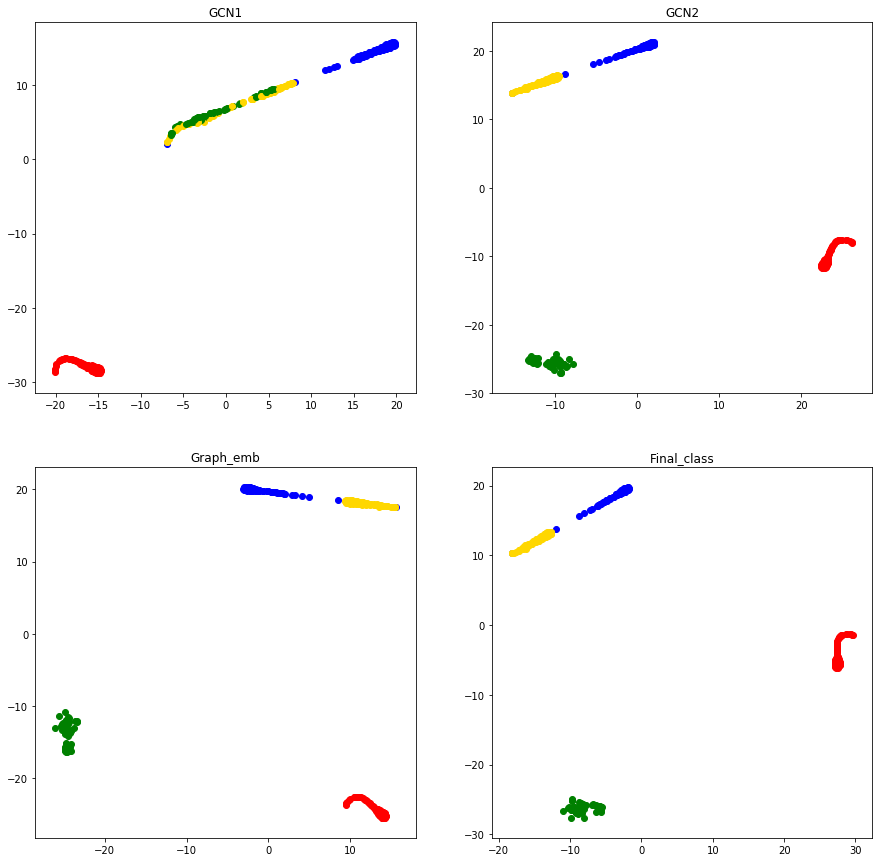

In [46]:
fig, axs = plt.subplots(2,2,figsize=(15,15))

# color = test_labels.cpu()*85/255

#class 0: cla 'green'
#class 1: rca 'red'
#class 2: csla 'blue'
#class 3: cska 'gold'

color = []
# marker = []

for i in range(len(test_labels)):
    if test_labels.cpu()[i] == 0:
        color.append('green')
#         marker.append('.')
    if test_labels.cpu()[i] == 1:
        color.append('red')
#         marker.append('^')
    if test_labels.cpu()[i] == 2:
        color.append('blue')
#         marker.append('v')
    if test_labels.cpu()[i] == 3:
        color.append('gold')
#         marker.append('s')

axs[0,0].set_title('GCN1')
axs[0,1].set_title('GCN2')
axs[1,0].set_title('Graph_emb')
axs[1,1].set_title('Final_class')
for i in range (len(test_labels)):
#     axs[0,0].scatter(vis1[i,0],vis1[i,1],color=(0,color[i],0))
#     axs[0,1].scatter(vis2[i,0],vis2[i,1],color=(0,color[i],0))
#     axs[1,0].scatter(vis3[i,0],vis3[i,1],color=(0,color[i],0))
#     axs[1,1].scatter(vis4[i,0],vis4[i,1],color=(0,color[i],0))
    axs[0,0].scatter(vis1[i,0],vis1[i,1],color=color[i])
    axs[0,1].scatter(vis2[i,0],vis2[i,1],color=color[i])
    axs[1,0].scatter(vis3[i,0],vis3[i,1],color=color[i])
    axs[1,1].scatter(vis4[i,0],vis4[i,1],color=color[i])
#     axs[0,0].scatter(vis1[i,0],vis1[i,1],color=color[i],marker=marker[i])
#     axs[0,1].scatter(vis2[i,0],vis2[i,1],color=color[i],marker=marker[i])
#     axs[1,0].scatter(vis3[i,0],vis3[i,1],color=color[i],marker=marker[i])
#     axs[1,1].scatter(vis4[i,0],vis4[i,1],color=color[i],marker=marker[i])

plt.show()

## End